# Import Libraries


In [1]:
# LIBRARIES
import numpy as np
import pandas as pd
import scipy
from pandas import Series, DataFrame
from math import sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pylab #to solve error with this
from pylab import * #to solve error with this
import seaborn as sns 
%matplotlib inline

# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# ESTIMATORS

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.feature_selection import RFE

# MODEL METRICS
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# CROSS VALIDATION
from sklearn.model_selection import train_test_split

# Reading Data Set

In [2]:
bank = pd.read_excel('bankFull.xlsx', header =0)

# Data Exploration

### General Views

In [18]:
# See the first five rows
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
# Column names
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [20]:
# Information about the data set
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [21]:
# looking for NAs values
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

> El conjunto de datos no contiene valores nulos.

In [22]:
# See main statistics
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Data Preparation

In [3]:
# Copy dataset
bank1 = bank.copy()

### Rename Columns

In [4]:
#rename "y" Default Variable
bank1.rename(columns={'y':'accept'}, inplace = True)
bank1.rename(columns={'day_of_week':'day'}, inplace = True)

### Change type of variables

In [5]:
# Convert to Categorical
bank1['job'] = pd.Categorical(bank1.job)
bank1['marital'] = pd.Categorical(bank1.marital)
bank1['education'] = pd.Categorical(bank1.education)
bank1['default'] = pd.Categorical(bank1.default)
bank1['housing'] = pd.Categorical(bank1.housing)
bank1['loan'] = pd.Categorical(bank1.loan)
bank1['contact'] = pd.Categorical(bank1.contact)
bank1['month'] = pd.Categorical(bank1.month)
bank1['day'] = pd.Categorical(bank1.day)
bank1['poutcome'] = pd.Categorical(bank1.poutcome)
bank1['accept'] = pd.Categorical(bank1.accept)

### Label Encoding
> Se codificaran las variables categóricas para que sean manejables en algunos clasificadores. No se sobreescribirá en las variables originales, sino que se crearan nuevas columnas diferenciadas con un guión bajo "_".

In [6]:
bank1["job_"] = bank1["job"].cat.codes
bank1["marital_"] = bank1["marital"].cat.codes
bank1["education_"] = bank1["education"].cat.codes
bank1["default_"] = bank1["default"].cat.codes
bank1["housing_"] = bank1["housing"].cat.codes
bank1["loan_"] = bank1["loan"].cat.codes
bank1["contact_"] = bank1["contact"].cat.codes
bank1["month_"] = bank1["month"].cat.codes
bank1["day_"] = bank1["day"].cat.codes
bank1["poutcome_"] = bank1["poutcome"].cat.codes
bank1["accept_"] = bank1["accept"].cat.codes

### Create and Discretize New Age Variable
> Se creará una nueva columna de edad (en rangos), para poder generar vistas de forma categórica.

In [7]:
# AGE
# Define bins
bins = [17, 33, 49, 65, 81, 98]

In [8]:
# Names for the 5 bins
group_names = ['17-33', '34-49', '50-65', '66-81', '82-98']

In [9]:
# Create new discretized age variable
bank1['age_range'] = pd.cut(bank1['age'], bins, labels = group_names)

### See Changes

In [10]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 33 columns):
age               41188 non-null int64
job               41188 non-null category
marital           41188 non-null category
education         41188 non-null category
default           41188 non-null category
housing           41188 non-null category
loan              41188 non-null category
contact           41188 non-null category
month             41188 non-null category
day               41188 non-null category
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null category
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
accept            41188 non-null category
job_              41188 non-n

# Analysis

### Deposits accepted VS no

Text(0.5, 0.98, 'Accept VS No accept')

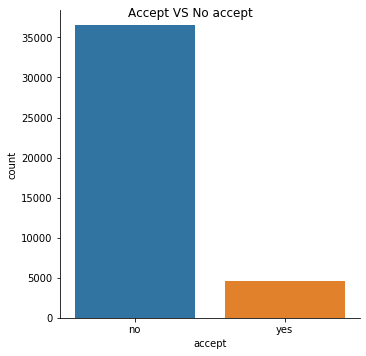

In [57]:
# Plot by accept
sx = sns.factorplot('accept', data=bank1, kind='count', aspect=1)
sx.fig.suptitle('Accept VS No accept')

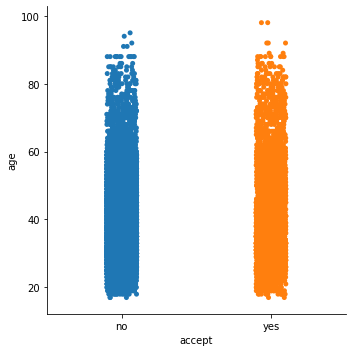

In [11]:
sns.catplot(x="accept", y="age", order=["no", "yes"], data=bank1)

In [15]:
# Group by accept
bank1.groupby('accept')['accept'].count()

accept
no     36548
yes     4640
Name: accept, dtype: int64

> Un 89% (36,548) de los clientes contactados han rechazado los planes de depósito ofrecidos por el banco. Esto muestra una muy baja tasa de efectividad en esta modalidad de captar recursos de tan solo el 11% (4,640).

### Education Level

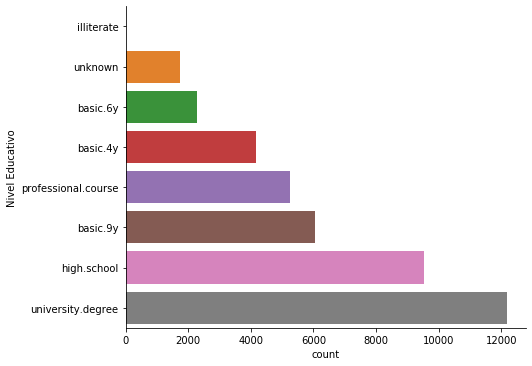

In [13]:
ed = sns.factorplot(y='education', data=bank1, kind='count', aspect=1.5, orient='h', 
                    order=['illiterate','unknown','basic.6y','basic.4y','professional.course','basic.9y',
                           'high.school','university.degree'])
ed.set_ylabels('Nivel Educativo')
#ed.fig.suptitle('Clientes según Nivel Educativo')

> La mayoría de clientes tienen estudios universitarios o high school.

In [27]:
# Group by STUDY
bank1.pivot_table('education_', 'education', aggfunc=len, margins=True)

,education_
education,
basic.4y,4176
basic.6y,2292
basic.9y,6045
high.school,9515
illiterate,18
professional.course,5243
university.degree,12168
unknown,1731
All,41188


In [12]:
ed_props = bank1.groupby("education")['accept'].value_counts(normalize=True).unstack()
ed_props

accept,no,yes
education,,
basic.4y,0.897510,0.102490
basic.6y,0.917976,0.082024
basic.9y,0.921754,0.078246
high.school,0.891645,0.108355
illiterate,0.777778,0.222222
professional.course,0.886515,0.113485
university.degree,0.862755,0.137245
unknown,0.854997,0.145003


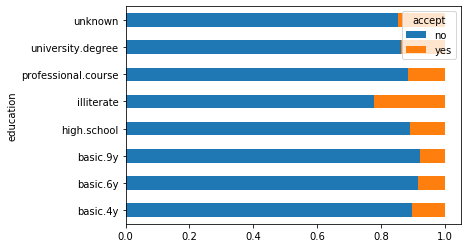

In [14]:
ed_props.plot(kind='barh', stacked='False')

> Por distribución de clientes según educación, podríamos decir que los grupos más importantes son universitarios, high school, basic 9y y professional course. De estos 4 grupos principales, quien presenta mayor inclinación a aceptar contratos son los universitarios con un 14%, seguido por los de professional course y high school ambos con un 11% y más abajo con un 8% los de basic 9y.

### Contact Type

Text(0.5, 0.98, 'Clients by Contact Type')

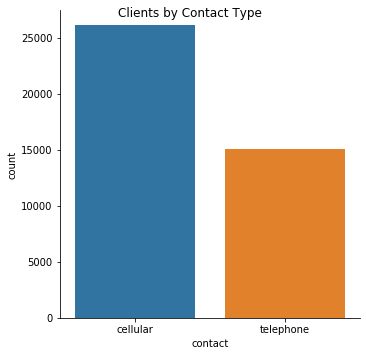

In [42]:
# Plot by SEX
cnt = sns.factorplot('contact', data=bank1, kind='count', aspect=1)
cnt.fig.suptitle('Clients by Contact Type')

In [43]:
bank1.pivot_table('contact_', 'contact', aggfunc=len, margins=True)

,contact_
contact,
cellular,26144
telephone,15044
All,41188


In [44]:
cnt_props = bank1.groupby("contact")['accept'].value_counts(normalize=True).unstack()
cnt_props

accept,no,yes
contact,,
cellular,0.852624,0.147376
telephone,0.947687,0.052313


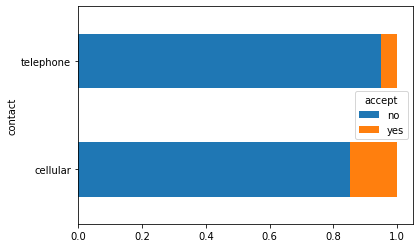

In [45]:
cnt_props.plot(kind='barh', stacked='True')

> No solamente el mayor número de contactos se hace a celulares, sino que proporcionalmente también se tiene más acierto de esta manera, por celular un 15% de los clientes aceptan un contrato mientras que por telefono fijo solo el 5%.

> Definitivamente son más acertados los contactos vía celular.

### Marital Status

Text(0.5, 0.98, 'Clients by Marital Status')

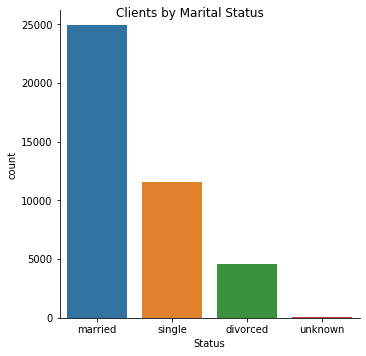

In [15]:
mrt = sns.factorplot('marital', data=bank1, kind='count', aspect=1, order=['married','single','divorced','unknown'])
mrt.set_xlabels('Status')
mrt.fig.suptitle('Clients by Marital Status')

In [48]:
# Group by MARITAL STATUS
bank1.pivot_table('marital_', 'marital', aggfunc=len, margins=True)

,marital_
marital,
divorced,4612
married,24928
single,11568
unknown,80
All,41188


In [49]:
mrt_props = bank1.groupby("marital")['accept'].value_counts(normalize=True).unstack()
mrt_props

accept,no,yes
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000


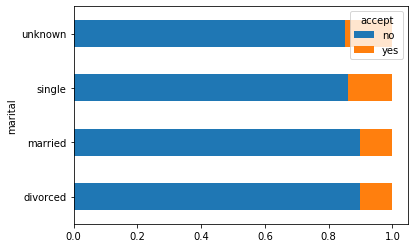

In [51]:
mrt_props.plot(kind='barh', stacked='True')

> Aunque se contactan más clientes casados (24,928) que solteros (11,568), los solteros muestran mayor proporción de contratos acertados, 14% vs 10% los casados.

> Por esta razón pensaríamos que es mejor priorizar clientes solteros que en otro estado marital.

### Job

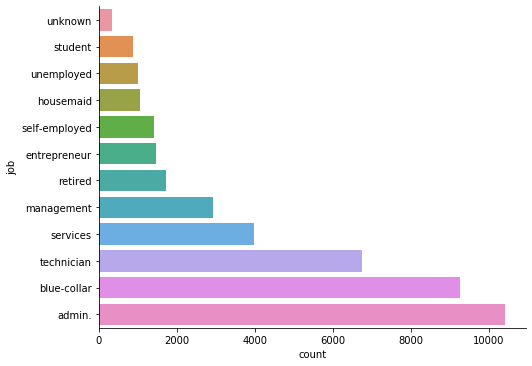

In [21]:
job = sns.factorplot(y='job', data=bank1, kind='count', aspect=1.5, orient='h', 
                     order=['unknown','student','unemployed','housemaid','self-employed','entrepreneur','retired',
                            'management','services','technician','blue-collar','admin.'])
#job.set_xlabels('Job')
#job.fig.suptitle('Clients by Job')

In [62]:
# Group by job
bank1.pivot_table('job_', 'job', aggfunc=len, margins=True)

,job_
job,
admin.,10422
blue-collar,9254
entrepreneur,1456
housemaid,1060
management,2924
retired,1720
self-employed,1421
services,3969
student,875


In [64]:
job_props = bank1.groupby("job")['accept'].value_counts(normalize=True).unstack()
job_props

accept,no,yes
job,,
admin.,0.870274,0.129726
blue-collar,0.931057,0.068943
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.747674,0.252326
self-employed,0.895144,0.104856
services,0.918619,0.081381
student,0.685714,0.314286


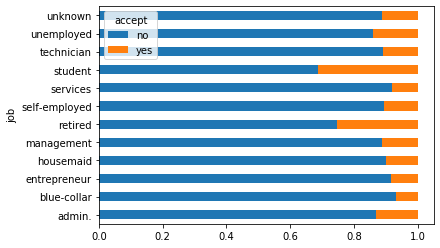

In [65]:
job_props.plot(kind='barh', stacked='True')

> Aunque los estudiantes y retirados no están entre los más contactados, cabe mencionar que su proporción a aceptar contrados son las más altas con un 31% y 25% respectivamente.

> Ahora, de los grupos que se contactan mayormente están los administrativos y técnicos, que muestran una aceptación del 13% y 11% respectivamente

### Age

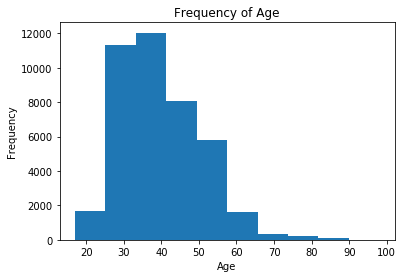

In [66]:
# Frequency of Age
plt.hist(bank1['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of Age')
plt.show()

> La gráfica muestra que la mayoría de clientes se encuentran entre los 25 y los 55 años principalmente.

In [68]:
# Group by age
bank1.groupby('age_range')['age_range'].count()

age_range
17-33    13004
34-49    20124
50-65     7436
66-81      520
82-98       99
Name: age_range, dtype: int64

#### De hecho, hasta el límite de los 50 años se concentra el 92% de los clientes, con un 56% de 21-35 años y un 36% de 36-50 años.

In [69]:
age_props = bank1.groupby("age_range")['accept'].value_counts(normalize=True).unstack()
age_props

accept,no,yes
age_range,,
17-33,0.866503,0.133497
34-49,0.913884,0.086116
50-65,0.881791,0.118209
66-81,0.540385,0.459615
82-98,0.484848,0.515152


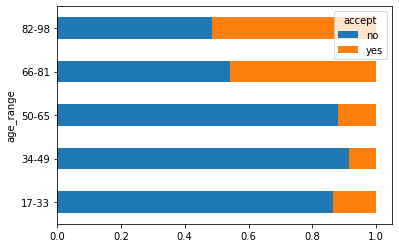

In [71]:
age_props.plot(kind='barh', stacked='True')

> Obserando estos datos por edad y relacionando con lo que vimos antes respecto al tipo de trabajo, vemos como se amarra que las personas que superan los 66 años (retirados) son los que más aceptan contratos de depósitos, lastimosamente no hay muchos clientes en estos rangos de edad.

> Puede haber una oportunidad acá y tratar de contactar a personas con este perfil: retirados que pasen los 60 años.

### Contacts by Day

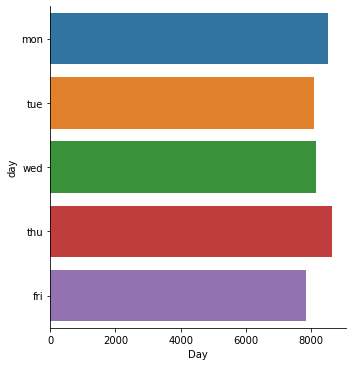

In [26]:
day = sns.factorplot(y='day', data=bank1, kind='count', aspect=1, order=['mon','tue','wed','thu','fri'])
day.set_xlabels('Day')
#day.fig.suptitle('Contacts by Day of Week')

In [27]:
# Group by day
bank1.pivot_table('day_', 'day', aggfunc=len, margins=True)

,day_
day,
fri,7827
mon,8514
thu,8623
tue,8090
wed,8134
All,41188


In [30]:
day_props = bank1.groupby("day")['accept'].value_counts(normalize=True).unstack()
day_props

accept,no,yes
day,,
fri,0.891913,0.108087
mon,0.900517,0.099483
thu,0.878812,0.121188
tue,0.882200,0.117800
wed,0.883329,0.116671


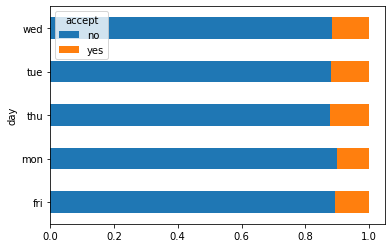

In [33]:
day_props.plot(kind='barh', stacked='True')

> Lunes y viernes se muestran como los días que menos contratos de depósitos aceptados se lograron (10% y 11% respectivamente). Mientras que de martes a jueves levemente la respuesta es más positiva (12%).

### Contacts by Month

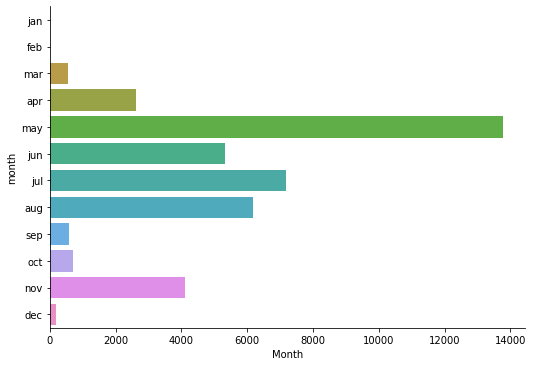

In [37]:
mth = sns.factorplot(y='month', data=bank1, kind='count', aspect=1.5, order=['jan','feb','mar','apr','may','jun','jul',
                                                                           'aug','sep','oct','nov','dec'])
mth.set_xlabels('Month')

In [39]:
# Group by day
bank1.pivot_table('month_', 'month', aggfunc=len, margins=True)

,month_
month,
apr,2632
aug,6178
dec,182
jul,7174
jun,5318
mar,546
may,13769
nov,4101
oct,718


In [40]:
mth_props = bank1.groupby("month")['accept'].value_counts(normalize=True).unstack()
mth_props

accept,no,yes
month,,
apr,0.795213,0.204787
aug,0.893979,0.106021
dec,0.510989,0.489011
jul,0.909534,0.090466
jun,0.894885,0.105115
mar,0.494505,0.505495
may,0.935653,0.064347
nov,0.898561,0.101439
oct,0.561281,0.438719


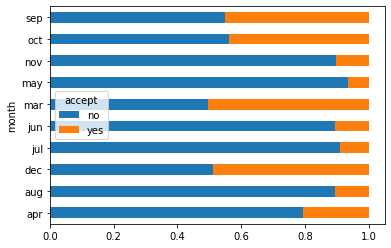

In [41]:
mth_props.plot(kind='barh', stacked='True')

> Al observar los datos por mes es interesante ver que los meses donde menos llamadas se efectuaron son los que mejor proporción de depositos aceptados se dieron: marzo (51%), diciembre (49%), setiembre (45%) y octubre (44%). Mientras que en mayo cuando más se intensifican las campañas los resultados positivos son bajos (6%).

> Sería interesante profundizar en las razones del por qué esos cuatro meses más altos presentan esa condición, quizá podrían dar pistas y hacer que las campañas de telemercadeo se efectuen en esos meses cuando mejores resultados se obtienen.

### Number of campaigns per customer

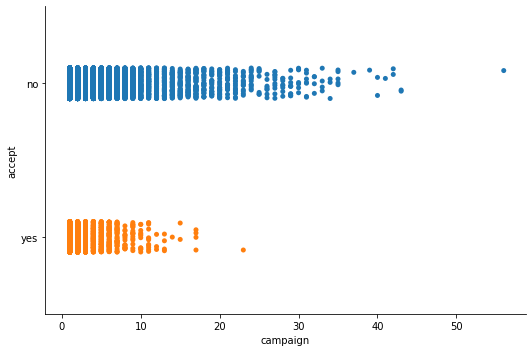

In [68]:
sns.catplot(y="accept", x="campaign", order=["no", "yes"], data=bank1, aspect=1.5)

> Este gráfico nos da una vista interesante respecto al número de veces que se contactó un cliente y podemos ver que los clientes que aceptaron un contrato de depósito no fueron contactados en tantas ocaciones como los que declinaron la oferta. 

> Podríamos decir con estos datos, que un número bueno de contactos podrían ser no más de 15, más allá de eso es menos probable que un cliente acepte el contrato.

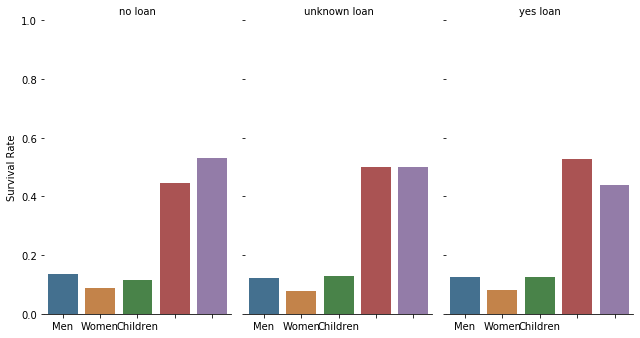

In [71]:
g = sns.catplot(x="age_range", y="accept_", col="loan",

                data=bank1, saturation=.5,

                kind="bar", ci=None, aspect=.6)

(g.set_axis_labels("", "Survival Rate")

  .set_xticklabels(["Men", "Women", "Children"])

  .set_titles("{col_name} {col_var}")

  .set(ylim=(0, 1))

  .despine(left=True))  

### Education, Marital Status & Pay

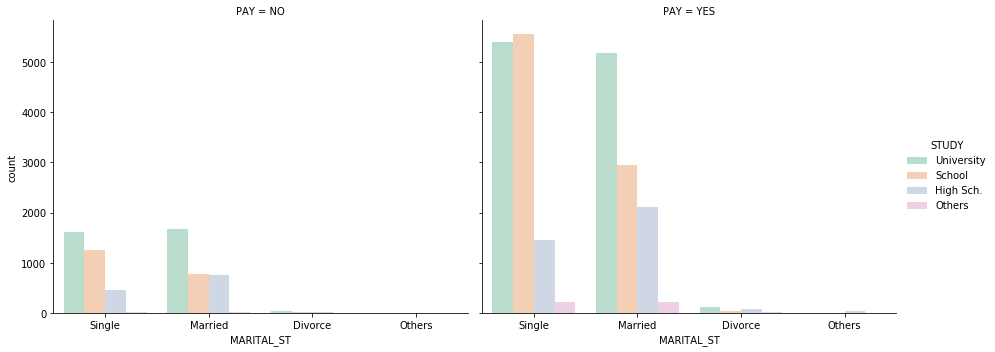

In [34]:
sns.factorplot('MARITAL_ST', data=credit1, kind='count', palette='Pastel2', hue='STUDY', col='PAY', 
               order=['Single','Married','Divorce','Others'], 
               hue_order=['University','School','High Sch.','Others'], aspect=1.25, size=5)

#### La gráfica anterior nos muestra que los clientes que más registros de pago reportaron eran solteros con educación escolar y universitaria. En el caso de los clientes casados el grupo mayor que reportaron pagos tenían educación universitaria.

#### Agrupando estos dos atributos podríamos este par de patrones interesantes que influyen en que un cliente tenga una probalidad de pago mayor respecto a los otros.

### Correlation

In [60]:
#CORRELATION
corrMat = bank1.corr()
print(corrMat)

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   
job_            0.001250 -0.006490 -0.006923 -0.028468  0.020965   
marital_       -0.389753  0.010290 -0.007240 -0.037942  0.038689   
education_     -0.117892 -0.015102  0.000371 -0.046626  0.038831   
default_        0.164965 -0.011794  0.032825  0.

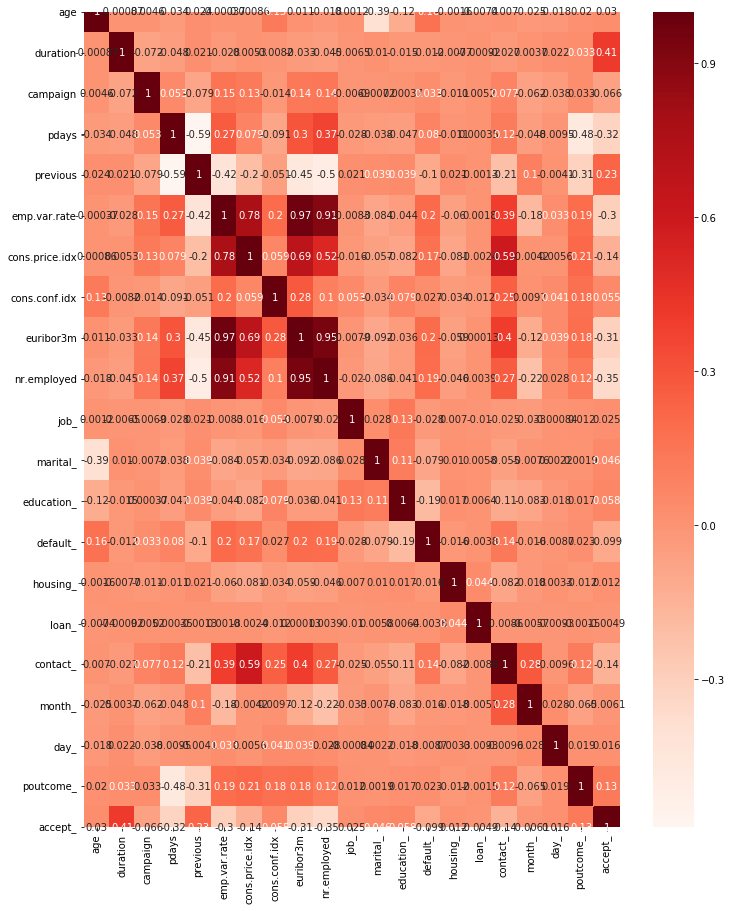

In [67]:
#Using Pearson Correlation
plt.figure(figsize=(12,15))
sns.heatmap(corrMat, annot=True, cmap=plt.cm.Reds)
plt.show()

### Covariance

In [43]:
#COVARIANCE
covMat = bank.cov()
print(covMat)

                       age      duration   campaign         pdays   previous  \
age             108.602451     -2.339147   0.132603    -66.945400   0.125661   
duration         -2.339147  67225.728877 -51.494888  -2305.683015   2.648520   
campaign          0.132603    -51.494888   7.672975     27.224921  -0.108494   
pdays           -66.945400  -2305.683015  27.224921  34935.687284 -54.346448   
previous          0.125661      2.648520  -0.108494    -54.346448   0.244927   
emp.var.rate     -0.006069    -11.391802   0.656017     79.574823  -0.326918   
cons.price.idx    0.005168      0.797272   0.204971      8.535132  -0.058190   
cons.conf.idx     6.239801     -9.807412  -0.176061    -79.016677  -0.116670   
euribor3m         0.194622    -14.793831   0.649236     96.250874  -0.390128   
nr.employed     -13.346160   -837.439866  28.838822   5031.877477 -17.926342   

                emp.var.rate  cons.price.idx  cons.conf.idx   euribor3m  \
age                -0.006069        0.005168

In [16]:
credit1.to_csv('credit2.csv', index=False)

# Feature Selection

In [15]:
bank1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'accept', 'job_', 'marital_', 'education_',
       'default_', 'housing_', 'loan_', 'contact_', 'month_', 'day_',
       'poutcome_', 'accept_', 'age_range'],
      dtype='object')

In [52]:
# All features
featuresALL = bank1.loc[ : , ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'accept', 'job_', 'marital_', 'education_',
       'default_', 'housing_', 'loan_', 'contact_', 'month_', 'day_',
       'poutcome_', 'accept_', 'age_range'] ]

In [29]:
# Features without BILL_AMTs & PAY_AMTs
features = bank1.loc[ : , ['age', 'job_', 'marital_', 'education_', 'default_', 'housing_', 'loan_', 'contact_', 
                           'month_', 'day_', 'poutcome_', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                           'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] ]
print('Summary of feature sample')
features.head()

Summary of feature sample


,age,job_,marital_,education_,default_,housing_,loan_,contact_,month_,day_,poutcome_,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [30]:
# Dependent Variable

depVar = bank1['accept']
depVar

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: accept, Length: 41188, dtype: category
Categories (2, object): [no, yes]

In [32]:
#Training Set (Feature Space: X Training)
X_train = (features[:])
X_train.head()

,age,job_,marital_,education_,default_,housing_,loan_,contact_,month_,day_,poutcome_,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [31]:
#Dependent Variable Training Set (y Training)
y_train = depVar[:]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 41188


0    no
1    no
2    no
3    no
4    no
Name: accept, dtype: category
Categories (2, object): [no, yes]

In [33]:
# CROSS VALIDATION
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

In [34]:
X_train.shape, X_test.shape

((28831, 19), (12357, 19))

# Experimento 1: Todas las variables

> En este experimento tomaremos todas las variables disponibles y echaremos a andar los modelos para observar que rendimientos obtenemos sin aplicar ningún tipo de selección de características.

### Decision Tree

In [35]:
# MODEL
modelDT = DecisionTreeClassifier(criterion='gini', max_depth=7)

In [36]:
# TRAINING
modelDT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
# SCORE
print(cross_val_score(modelDT, X_train, y_train, cv=10, n_jobs=2)) 
modelDT.score(X_train,y_train)

[0.89875173 0.90325936 0.89667129 0.90253208 0.89594173 0.89559487
 0.90079778 0.8997572  0.888966   0.89590562]


0.9075994589157504

In [38]:
# PREDICTIONS
predictionsDT = modelDT.predict(X_test)

In [39]:
# CONFUSION MATRIX
confusion_matrix(y_test, predictionsDT, labels=['no', 'yes'])
pd.crosstab(y_test, predictionsDT, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,no,yes,All
True,,,
no,10733,227,10960
yes,1016,381,1397
All,11749,608,12357


In [40]:
# CLASIFICATION REPORT
target_names = ['no', 'yes']
print(classification_report(y_test, predictionsDT, target_names=target_names))

              precision    recall  f1-score   support

          no       0.91      0.98      0.95     10960
         yes       0.63      0.27      0.38      1397

    accuracy                           0.90     12357
   macro avg       0.77      0.63      0.66     12357
weighted avg       0.88      0.90      0.88     12357



### SVC

In [53]:
# MODEL
modelSVC = svm.SVC(C=1.0, kernel='rbf')

In [54]:
# TRAINING
modelSVC.fit(X_train,y_train)

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [55]:
# SCORE
print(cross_val_score(modelSVC, X_train, y_train, cv=10, n_jobs=2)) 
modelSVC.score(X_train,y_train)

[0.89320388 0.89355062 0.89042996 0.88865765 0.89420742 0.89004509
 0.89247312 0.8935137  0.88376128 0.89312977]


0.9260865041101592

In [56]:
# PREDICTIONS
predictionsSVC = modelSVC.predict(X_test)

In [57]:
# CONFUSION MATRIX
confusion_matrix(y_test, predictionsSVC, labels=['no', 'yes'])
pd.crosstab(y_test, predictionsSVC, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,no,yes,All
True,,,
no,10814,146,10960
yes,1151,246,1397
All,11965,392,12357


In [58]:
# CLASIFICATION REPORT
target_names = ['no', 'yes']
print(classification_report(y_test, predictionsSVC, target_names=target_names))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94     10960
         yes       0.63      0.18      0.28      1397

    accuracy                           0.90     12357
   macro avg       0.77      0.58      0.61     12357
weighted avg       0.87      0.90      0.87     12357



### KNN

In [41]:
# MODEL
modelKNN = KNeighborsClassifier(n_jobs=2, n_neighbors=7)

In [42]:
# TRAINING
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=2, n_neighbors=7, p=2,
                     weights='uniform')

In [43]:
# SCORE
print(cross_val_score(modelKNN, X_train, y_train, cv=10, n_jobs=2)) 
modelKNN.score(X_train,y_train)

[0.88765603 0.89875173 0.89355062 0.88969823 0.8855359  0.88969823
 0.89420742 0.89836975 0.88619015 0.89555864]


0.9084665811106101

In [44]:
# PREDICTIONS
predictionsKNN = modelKNN.predict(X_test)

In [45]:
# CONFUSION MATRIX
confusion_matrix(y_test, predictionsKNN, labels=['no', 'yes'])
pd.crosstab(y_test, predictionsKNN, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,no,yes,All
True,,,
no,10675,285,10960
yes,996,401,1397
All,11671,686,12357


In [46]:
# CLASIFICATION REPORT
target_names = ['NO', 'YES']
print(classification_report(y_test, predictionsKNN, target_names=target_names))

              precision    recall  f1-score   support

          NO       0.91      0.97      0.94     10960
         YES       0.58      0.29      0.39      1397

    accuracy                           0.90     12357
   macro avg       0.75      0.63      0.66     12357
weighted avg       0.88      0.90      0.88     12357



### Random Forest

In [47]:
# MODEL
modelRF = RandomForestClassifier(max_depth=10, n_estimators=30, n_jobs=2, criterion='gini')

In [48]:
# TRAINING
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [49]:
# SCORE
print(cross_val_score(modelRF, X_train, y_train, cv=10, n_jobs=2)) 
modelRF.score(X_train,y_train)

[0.89875173 0.90638003 0.89944521 0.89802289 0.89524801 0.89767603
 0.90426639 0.90287895 0.89417071 0.9018043 ]


0.9197738545315806

In [50]:
# PREDICTIONS
predictionsRF = modelRF.predict(X_test)

In [51]:
# CONFUSION MATRIX
confusion_matrix(y_test, predictionsRF, labels=['no', 'yes'])
pd.crosstab(y_test, predictionsRF, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,no,yes,All
True,,,
no,10777,183,10960
yes,1037,360,1397
All,11814,543,12357


In [52]:
# CLASIFICATION REPORT
target_names = ['no', 'yes']
print(classification_report(y_test, predictionsRF, target_names=target_names))

              precision    recall  f1-score   support

          no       0.91      0.98      0.95     10960
         yes       0.66      0.26      0.37      1397

    accuracy                           0.90     12357
   macro avg       0.79      0.62      0.66     12357
weighted avg       0.88      0.90      0.88     12357



# Experimento 2: RFE

#### Estos modelos fueron elaborados según la sugerencia de variables efectuado por la función Recursive Feature Elimination.

In [35]:
#use random forest as the model
rfeRF = RandomForestClassifier()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(rfeRF, n_features_to_select=10)
rfe.fit(featuresALL,depVar)

print(rfe.support_)
print(rfe.ranking_)

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[ True False False False  True  True False False False False False  True
  True  True  True  True  True  True False False False False False]
[ 1 14 10 13  1  1  4  8 11 12  9  1  1  1  1  1  1  1  2  3  7  5  6]


##### Variables seleccionadas 'LIMIT_BAL', 'x', 'x', 'x', 'AGE', 'PAY_STA_SET', 'x', 'x', 'x', 'x', 'x', 'BILL_AMT_SET', 
##### 'BILL_AMT_AGO', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SET', 'x', 'x', 'x', 'x', 'x'

In [107]:
# Features with RFE
featuresRFE = credit1.loc[ : , ['LIMIT_BAL', 'AGE', 'PAY_STA_SET', 'BILL_AMT_SET', 'BILL_AMT_AGO', 'BILL_AMT_JUL', 
                                'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SET'] ]
print('Summary of feature sample')
featuresRFE.head()

Summary of feature sample


,LIMIT_BAL,AGE,PAY_STA_SET,BILL_AMT_SET,BILL_AMT_AGO,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SET
0,20000,24,2,3913,3102,689,0,0,0,0
1,120000,26,-1,2682,1725,2682,3272,3455,3261,0
2,90000,34,0,29239,14027,13559,14331,14948,15549,1518
3,50000,37,0,46990,48233,49291,28314,28959,29547,2000
4,50000,57,-1,8617,5670,35835,20940,19146,19131,2000


In [108]:
# Dependent Variable

depVarRFE = credit1['PAY']

In [109]:
#Training Set (Feature Space: X Training)
X_trainRFE = (featuresRFE[:])
X_trainRFE.head()

,LIMIT_BAL,AGE,PAY_STA_SET,BILL_AMT_SET,BILL_AMT_AGO,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SET
0,20000,24,2,3913,3102,689,0,0,0,0
1,120000,26,-1,2682,1725,2682,3272,3455,3261,0
2,90000,34,0,29239,14027,13559,14331,14948,15549,1518
3,50000,37,0,46990,48233,49291,28314,28959,29547,2000
4,50000,57,-1,8617,5670,35835,20940,19146,19131,2000


In [110]:
#Dependent Variable Training Set (y Training)
y_trainRFE = depVarRFE[:]
y_train_countRFE = len(y_trainRFE.index)
print('The number of observations in the Y training set are:',str(y_train_countRFE))
y_trainRFE.head()

The number of observations in the Y training set are: 30000


0     NO
1     NO
2    YES
3    YES
4    YES
Name: PAY, dtype: category
Categories (2, object): [NO, YES]

In [111]:
#Testing Set (X Testing)
X_testRFE = featuresRFE[-100:]
X_test_countRFE = len(X_testRFE.index)
print('The number of observations in the feature testing set is:',str(X_test_countRFE))
print(X_testRFE.head())

The number of observations in the feature testing set is: 100
       LIMIT_BAL  AGE PAY_STA_SET  BILL_AMT_SET  BILL_AMT_AGO  BILL_AMT_JUL  \
29900      20000   29           0         16809             0             0   
29901      50000   29           1         50845         48750        103486   
29902     170000   30           0         10392        168088        168955   
29903     260000   30          -1         27378         17082         13333   
29904      60000   30           0         54952         56021         54126   

       BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SET  
29900             0             0             0            0  
29901         50590         50248         49387            0  
29902        161351        126198        124746       168096  
29903            99            99        172104        10018  
29904         58732         59306         59728         2600  


In [112]:
#Ground Truth (y_test) 
y_testRFE = depVarRFE[-100:]
y_test_countRFE = len(y_testRFE.index)
print('The number of observations in the Y training set are:',str(y_test_countRFE))
y_testRFE.head()

The number of observations in the Y training set are: 100


29900     NO
29901    YES
29902    YES
29903    YES
29904     NO
Name: PAY, dtype: category
Categories (2, object): [NO, YES]

In [113]:
# CROSS VALIDATION
X_trainRFE, X_testRFE, y_trainRFE, y_testRFE = train_test_split(X_trainRFE, y_trainRFE, test_size=0.3)

In [114]:
X_trainRFE.shape, X_testRFE.shape

((21000, 10), (9000, 10))

# Tuning and Modeling with RFE

In [115]:
# MODELS
modelDTrfe = DecisionTreeClassifier(criterion='gini', max_depth=7)
modelSVCrfe = svm.SVC(C=1.0, kernel='rbf')
modelKNNrfe = KNeighborsClassifier(n_jobs=2, n_neighbors=7)
modelRFrfe = RandomForestClassifier(max_depth=10, n_estimators=30, n_jobs=2, criterion='gini')

### Decision Tree

In [118]:
# TRAINING
modelDTrfe.fit(X_trainRFE,y_trainRFE)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [119]:
# SCORE
print(cross_val_score(modelDTrfe, X_trainRFE, y_trainRFE, cv=10, n_jobs=2)) 
modelDTrfe.score(X_trainRFE,y_trainRFE)

[0.81199429 0.81485007 0.81675393 0.81761905 0.81095238 0.81238095
 0.82380952 0.80657456 0.81419724 0.81657932]


0.8270952380952381

In [120]:
# PREDICTIONS
predictionsDTrfe = modelDTrfe.predict(X_testRFE)

In [121]:
# EVALUATING RESULTS
accuracyDTrfe = accuracy_score(y_testRFE, predictionsDTrfe)
kappaDTrfe = cohen_kappa_score(y_testRFE, predictionsDTrfe)

print('Accuracy: %.3f' % accuracyDTrfe)
print('Kappa: %.3f' % kappaDTrfe)

Accuracy: 0.821
Kappa: 0.363


In [122]:
# CONFUSION MATRIX
confusion_matrix(y_testRFE, predictionsDTrfe, labels=['NO', 'YES'])

array([[ 682, 1247],
       [ 361, 6710]], dtype=int64)

In [123]:
pd.crosstab(y_testRFE, predictionsDTrfe, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,NO,YES,All
True,,,
NO,682,1247,1929
YES,361,6710,7071
All,1043,7957,9000


In [124]:
# CLASIFICATION REPORT
target_names = ['NO', 'YES']
print(classification_report(y_testRFE, predictionsDTrfe, target_names=target_names))

              precision    recall  f1-score   support

          NO       0.65      0.35      0.46      1929
         YES       0.84      0.95      0.89      7071

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



### SVC

In [125]:
# TRAINING
modelSVCrfe.fit(X_trainRFE,y_trainRFE)

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [126]:
# SCORE
print(cross_val_score(modelSVCrfe, X_trainRFE, y_trainRFE, cv=10, n_jobs=2)) 
modelSVCrfe.score(X_trainRFE,y_trainRFE)

[0.77582104 0.77772489 0.77534507 0.77428571 0.77571429 0.77714286
 0.77714286 0.77656027 0.77656027 0.77513101]


0.9949523809523809

In [127]:
# PREDICTIONS
predictionsSVCrfe = modelSVCrfe.predict(X_testRFE)

In [128]:
# EVALUATING RESULTS
accuracySVCrfe = accuracy_score(y_testRFE, predictionsSVCrfe)
kappaSVCrfe = cohen_kappa_score(y_testRFE, predictionsSVCrfe)

print('Accuracy: %.3f' % accuracySVCrfe)
print('Kappa: %.3f' % kappaSVCrfe)

Accuracy: 0.786
Kappa: 0.018


In [129]:
# CONFUSION MATRIX
confusion_matrix(y_testRFE, predictionsSVCrfe, labels=['NO', 'YES'])

array([[  28, 1901],
       [  21, 7050]], dtype=int64)

In [130]:
pd.crosstab(y_testRFE, predictionsSVCrfe, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,NO,YES,All
True,,,
NO,28,1901,1929
YES,21,7050,7071
All,49,8951,9000


In [131]:
# CLASIFICATION REPORT
target_names = ['NO', 'YES']
print(classification_report(y_testRFE, predictionsSVCrfe, target_names=target_names))

              precision    recall  f1-score   support

          NO       0.57      0.01      0.03      1929
         YES       0.79      1.00      0.88      7071

    accuracy                           0.79      9000
   macro avg       0.68      0.51      0.45      9000
weighted avg       0.74      0.79      0.70      9000



### KNN

In [132]:
# TRAINING
modelKNNrfe.fit(X_trainRFE,y_trainRFE)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=2, n_neighbors=7, p=2,
                     weights='uniform')

In [133]:
# SCORE
print(cross_val_score(modelKNNrfe, X_trainRFE, y_trainRFE, cv=10, n_jobs=2)) 
modelKNNrfe.score(X_trainRFE,y_trainRFE)

[0.75868634 0.76106616 0.7591623  0.74809524 0.75047619 0.74714286
 0.75380952 0.75607432 0.74654597 0.75940924]


0.8018571428571428

In [134]:
# PREDICTIONS
predictionsKNNrfe = modelKNNrfe.predict(X_testRFE)

In [135]:
# EVALUATING RESULTS
accuracyKNNrfe = accuracy_score(y_testRFE, predictionsKNNrfe)
kappaKNNrfe = cohen_kappa_score(y_testRFE, predictionsKNNrfe)

print('Accuracy: %.3f' % accuracyKNNrfe)
print('Kappa: %.3f' % kappaKNNrfe)

Accuracy: 0.762
Kappa: 0.112


In [136]:
# CONFUSION MATRIX
confusion_matrix(y_testRFE, predictionsKNNrfe, labels=['NO', 'YES'])

array([[ 314, 1615],
       [ 523, 6548]], dtype=int64)

In [137]:
pd.crosstab(y_testRFE, predictionsKNNrfe, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,NO,YES,All
True,,,
NO,314,1615,1929
YES,523,6548,7071
All,837,8163,9000


In [138]:
# CLASIFICATION REPORT
target_names = ['NO', 'YES']
print(classification_report(y_testRFE, predictionsKNNrfe, target_names=target_names))

              precision    recall  f1-score   support

          NO       0.38      0.16      0.23      1929
         YES       0.80      0.93      0.86      7071

    accuracy                           0.76      9000
   macro avg       0.59      0.54      0.54      9000
weighted avg       0.71      0.76      0.72      9000



### Random Forest

In [139]:
# TRAINING
modelRFrfe.fit(X_trainRFE,y_trainRFE)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [140]:
# SCORE
print(cross_val_score(modelRFrfe, X_trainRFE, y_trainRFE, cv=10, n_jobs=2)) 
modelRFrfe.score(X_trainRFE,y_trainRFE)

[0.82008567 0.8210376  0.8262732  0.82047619 0.81238095 0.81142857
 0.82238095 0.81419724 0.81800858 0.82086708]


0.8413809523809523

In [141]:
# PREDICTIONS
predictionsRFrfe = modelRFrfe.predict(X_testRFE)

In [142]:
# EVALUATING RESULTS
accuracyRFrfe = accuracy_score(y_testRFE, predictionsRFrfe)
kappaRFrfe = cohen_kappa_score(y_testRFE, predictionsRFrfe)

print('Accuracy: %.3f' % accuracyRFrfe)
print('Kappa: %.3f' % kappaRFrfe)

Accuracy: 0.821
Kappa: 0.357


In [143]:
# CONFUSION MATRIX
confusion_matrix(y_testRFE, predictionsRFrfe, labels=['NO', 'YES'])

array([[ 663, 1266],
       [ 345, 6726]], dtype=int64)

In [144]:
pd.crosstab(y_testRFE, predictionsRFrfe, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,NO,YES,All
True,,,
NO,663,1266,1929
YES,345,6726,7071
All,1008,7992,9000


In [145]:
# CLASIFICATION REPORT
target_names = ['NO', 'YES']
print(classification_report(y_testRFE, predictionsRFrfe, target_names=target_names))

              precision    recall  f1-score   support

          NO       0.66      0.34      0.45      1929
         YES       0.84      0.95      0.89      7071

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000



# Experiment 3 - Principal

#### Los siguiente modelos únicamente incluyen aquellas variables que se pueden conocer en el momento preciso que una persona solicita un crédito. Consideramos que es el conjunto de datos más real para el caso específico de predecir si una persona pagará su préstamo antes de ser autorizado.

In [15]:
credit1A = credit.copy()

### Data Preparation

In [16]:
#rename "y" Default Variable
credit1A.rename(columns={'default payment next month':'PAY_NEXT_MONTH'}, inplace = True)

In [18]:
# Duplicate and redifine the 'Y' variable
credit1A['PAY'] = credit1A.PAY_NEXT_MONTH.map({0:'YES', 1:'NO'})

# Duplicate the columns with changes in the names of the categories
credit1A['STUDY'] = credit1A.EDUCATION.map({0:0, 1:1, 2:2, 3:3, 4:0, 5:0, 6:0})

### Feature Selection

In [30]:
# Features without BILL_AMTs & PAY_AMTs
features3 = credit1A.loc[ : , ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE'] ]

In [31]:
# Dependent Variable
depVar3 = credit1A['PAY']

In [32]:
#Training Set (Feature Space: X Training)
X_train3 = (features3[:])

In [33]:
#Dependent Variable Training Set (y Training)
y_train3 = depVar3[:]

In [34]:
# CROSS VALIDATION
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_train3, y_train3, test_size=0.3) 

In [35]:
X_train3.shape, X_test3.shape

((21000, 5), (9000, 5))

## Models

### Decision Tree

In [334]:
# MODEL
modelDT3 = DecisionTreeClassifier(criterion='gini', max_depth=10)

In [335]:
# TRAINING
modelDT3.fit(X_train3,y_train3)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [336]:
# SCORE
print(cross_val_score(modelDT3, X_train3, y_train3, cv=10, n_jobs=2)) 
modelDT3.score(X_train3,y_train3)

[0.77820086 0.76344598 0.7710614  0.76666667 0.76761905 0.76428571
 0.76619048 0.7746546  0.7665555  0.77179609]


0.7908095238095239

In [337]:
# PREDICTIONS
predictionsDT3 = modelDT3.predict(X_test3)

In [338]:
# CONFUSION MATRIX
confusion_matrix(y_test3, predictionsDT3, labels=['NO', 'YES'])
pd.crosstab(y_test3, predictionsDT3, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,NO,YES,All
True,,,
NO,89,1940,2029
YES,182,6789,6971
All,271,8729,9000


In [339]:
# CLASIFICATION REPORT
target_names = ['NO', 'YES']
print(classification_report(y_test3, predictionsDT3, target_names=target_names))

              precision    recall  f1-score   support

          NO       0.33      0.04      0.08      2029
         YES       0.78      0.97      0.86      6971

    accuracy                           0.76      9000
   macro avg       0.55      0.51      0.47      9000
weighted avg       0.68      0.76      0.69      9000



### SVC

In [328]:
# MODEL
modelSVC3 = svm.SVC(C=1, kernel='rbf')

In [329]:
# TRAINING
modelSVC3.fit(X_train3,y_train3)

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [330]:
# SCORE
print(cross_val_score(modelSVC3, X_train3, y_train3, cv=10, n_jobs=2)) 
modelSVC3.score(X_train3,y_train3)

[0.78010471 0.77724893 0.77772489 0.77333333 0.78238095 0.77571429
 0.77952381 0.77989519 0.77608385 0.78275369]


0.7870952380952381

In [331]:
# PREDICTIONS
predictionsSVC3 = modelSVC3.predict(X_test3)

In [333]:
pd.crosstab(y_test3, predictionsSVC3, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,NO,YES,All
True,,,
NO,34,1995,2029
YES,58,6913,6971
All,92,8908,9000


In [332]:
# CLASIFICATION REPORT
target_names = ['NO', 'YES']
print(classification_report(y_test3, predictionsSVC3, target_names=target_names))

              precision    recall  f1-score   support

          NO       0.37      0.02      0.03      2029
         YES       0.78      0.99      0.87      6971

    accuracy                           0.77      9000
   macro avg       0.57      0.50      0.45      9000
weighted avg       0.68      0.77      0.68      9000



### KNN

In [340]:
# MODEL
modelKNN3 = KNeighborsClassifier(n_jobs=2, n_neighbors=13, weights='uniform', p=1)

In [341]:
# TRAINING
modelKNN3.fit(X_train3,y_train3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=2, n_neighbors=13, p=1,
                     weights='uniform')

In [342]:
# SCORE
print(cross_val_score(modelKNN3, X_train3, y_train3, cv=10, n_jobs=2)) 
modelKNN3.score(X_train3,y_train3)

[0.77296525 0.76820562 0.76677772 0.76428571 0.77619048 0.7647619
 0.76761905 0.7746546  0.76322058 0.77179609]


0.7857619047619048

In [343]:
# PREDICTIONS
predictionsKNN3 = modelKNN3.predict(X_test3)

In [344]:
# CONFUSION MATRIX
confusion_matrix(y_test3, predictionsKNN3, labels=['NO', 'YES'])
pd.crosstab(y_test3, predictionsKNN3, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,NO,YES,All
True,,,
NO,127,1902,2029
YES,204,6767,6971
All,331,8669,9000


In [345]:
# CLASIFICATION REPORT
target_names = ['NO', 'YES']
print(classification_report(y_test3, predictionsKNN3, target_names=target_names))

              precision    recall  f1-score   support

          NO       0.38      0.06      0.11      2029
         YES       0.78      0.97      0.87      6971

    accuracy                           0.77      9000
   macro avg       0.58      0.52      0.49      9000
weighted avg       0.69      0.77      0.69      9000



### Random Forest

In [346]:
# MODEL
modelRF3 = RandomForestClassifier(max_depth=7, n_estimators=70, n_jobs=2, criterion='gini')

In [347]:
# TRAINING
modelRF3.fit(X_train3,y_train3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [348]:
# SCORE
print(cross_val_score(modelRF3, X_train3, y_train3, cv=10, n_jobs=2)) 
modelRF3.score(X_train3,y_train3)

[0.78058068 0.77867682 0.78010471 0.78142857 0.78047619 0.78047619
 0.78047619 0.78084802 0.77941877 0.78037161]


0.780952380952381

In [349]:
# PREDICTIONS
predictionsRF3 = modelRF3.predict(X_test3)

In [350]:
# CONFUSION MATRIX
confusion_matrix(y_test3, predictionsRF3, labels=['NO', 'YES'])
pd.crosstab(y_test3, predictionsRF3, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,YES,All
True,,
NO,2029,2029
YES,6971,6971
All,9000,9000


In [351]:
# CLASIFICATION REPORT
target_names = ['NO', 'YES']
print(classification_report(y_test3, predictionsRF3, target_names=target_names))

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          NO       0.00      0.00      0.00      2029
         YES       0.77      1.00      0.87      6971

    accuracy                           0.77      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.77      0.68      9000

